In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data=pd.read_csv('Position_Salaries.csv')

In [3]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [5]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [6]:
data.Position.value_counts()

Junior Consultant    1
Manager              1
Senior Partner       1
Senior Consultant    1
Country Manager      1
CEO                  1
Business Analyst     1
Region Manager       1
C-level              1
Partner              1
Name: Position, dtype: int64

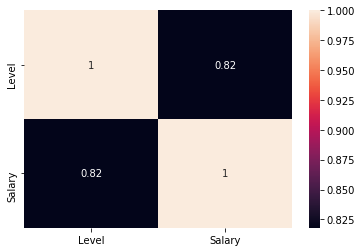

In [9]:
sns.heatmap(data.corr(),annot=True)

In [11]:
x=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values

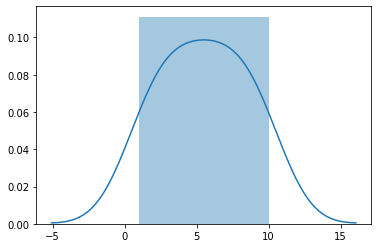

In [12]:
sns.distplot(x,
    bins=10)

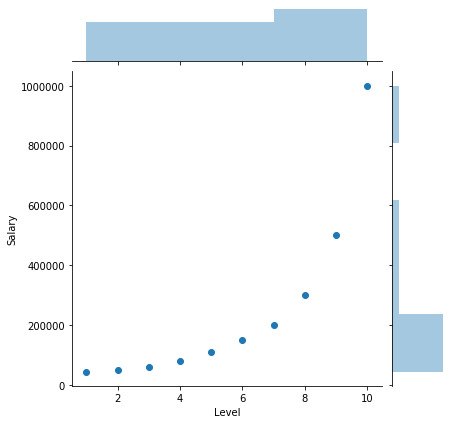

In [20]:
sns.jointplot('Level','Salary',data=data,kind='scatter')

In [21]:
#train test split

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=32)

In [29]:
#Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()

In [25]:
le.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
predict=le.predict(x_test)

In [27]:
print(y_test,predict)

[1000000   50000   60000] [415032.89473684   9638.15789474  60312.5       ]


In [28]:
from sklearn.metrics import r2_score
print(r2_score(y_test,predict))

0.42254670776899794


In [58]:
#polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
x_poly = poly_reg.fit_transform(x_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
predict1=lin_reg_2.predict(poly_reg.fit_transform(x_test))
print(y_test,predict1)

[1000000   50000   60000] [897663.88816514  44927.06433975  56170.22662158]


In [60]:
from sklearn.metrics import r2_score
print(r2_score(y_test,predict1))

0.9823428256200522


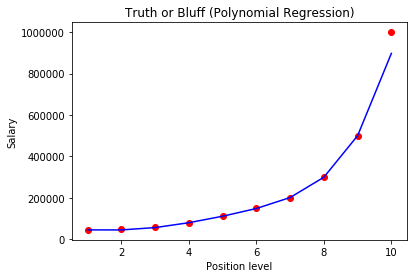

In [72]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()